
# Table of content 


1.   Introduction
2.   Data Requirments
3.   Data collection
4.   Load data
5.   Data understanding 
6.   Data Preparation
7.   Analysing and visualising data
8.   Data Munging
     - 8.1. Transform the Data
     - 8.2. Hot Encoding
     - 8.3. Check missing Values
     
9.   Selecting the features
10.   Training Machine learning algorithm and predicting 
11.   Conclusion 
 

## 1- Introduction

In this research we will discuss a sensitive matter that affects the climate each day, We use cars daily in our lives without thinking of the CO2 car's emissions that have a serious impact on the climate, Regardless of the development that we have reached today and the laws that try to limit this issue, The climate still suffer from this impact. In this research, we will try to help with dealing with this issue by providing an AI algorithm to classify all the cars in the Netherlands that are provided from the RDW database from 1 to 10 according to the CO2 emissions it emits and fuel consumption.

## 2- Data Requirments

First I will give you a general information about the RDW datasets, Then I will list all the columns names and explain them for each dataset, Lastly, I will provide a short description of the European cars categorize because we are going to use them .<br>

overview about the dataset:

The Registered_vehicles data set contains 14.4 million rows and 67 columns.<br>
The Registered_vehicles_fuel dataset has 13.7 million rows and 34 column.<br>
The date of the last update was on  October 12 2021 for both datasets.<br>
The Datasets is in a CSV format<br>

**Note:** I will only choose the columns that I will need because we have 2 data sets the datasets contain a total of 101 columns 

### Open Data RDW: Gekentekende_voertuigen  (Registered_vehicles)columns names and explanation :



**License Plate**	
The license plate of a vehicle consists of a combination of numbers and letters. This combination is stated on the registration certificate and the number plate. The license plate makes a vehicle unique and identifiable.

**Vehicle type**
type of vehicle (personal or commercial)

**Brand**
The brand of the vehicle

**number of seats**
number of seats in the vehicle

**Amount of cilinders**
The numbers of cilinders that exist in the car engin.The more cylders the more fuel consumption

**Mass of empty vehicle**

**number of doors**

**European vehicle category**
European classification for vehicle category, based in UNECE standards

**Technical max. vehicle mass**


### Open Data RDW:Gekentekende_voertuigen_brandstof(Registered_vehicles_fuel) columns names and explanation:


**License Plate**	
The license plate of a vehicle consists of a combination of numbers and letters. This combination is stated on the registration certificate and the number plate. The license plate makes a vehicle unique and identifiable.

**Fuel Sequence Number**	
Sequence number with which the emission data can be shown in the desired order for a specific fuel.

**Fuel description**
specific fuel name

**Out-of-town fuel consumption**	
The fuel consumption in l/100 km, during a standardized extra-urban journey, tested on a chassis dynamometer.


**Fuel consumption combined**	
Fuel consumption in l/100 km, during a combination of standardized urban and extra-urban driving, tested on a chassis dynamometer.

**City fuel consumption**	
The fuel consumption in l/100 km, during a standardized urban driving cycle, tested on a chassis dynamometer.


**CO2 emissions combined**	
The weighted CO2 emissions in g/km of a plug-in hybrid vehicle, during a combination of an urban and an extra-urban trip, tested on a chassis dynamometer. The value is calculated based on the emissions generated by driving once with empty batteries and once with full batteries.

**Weighted CO2 emissions**	
CO2 emissions measured on a vehicle measured on a chassis dynamometer, applicable to an externally rechargeable hybrid electric vehicle, weighted with an external charging combined according to the calculation in the directive.<br>




















###  overview over the European Commission and the United Nations classifieds vehicles as part of emission standards and other vehicle regulations<br>

Because I will do my classification per Eu cars category I will explain how do they categorize them below per each category

**CATEGORY: M**<br><br>
Category M – Motor vehicles having at least four wheels and for the carriage of passengers<br>
Category	Vehicle Description:<br>
<br>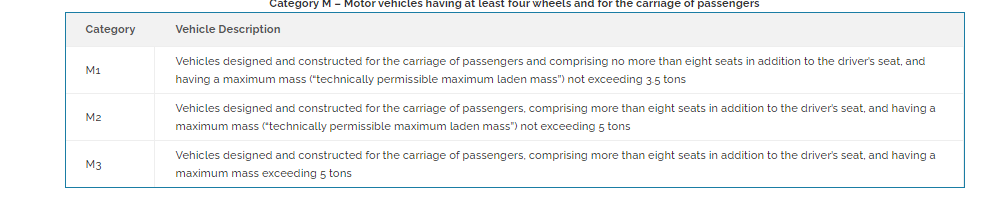<br>
**CATEGORY: N**<br><br>
Category N – Power-driven vehicles having at least four wheels and for the carriage of goods<br><br>
Category	Vehicle Description:<br><br>
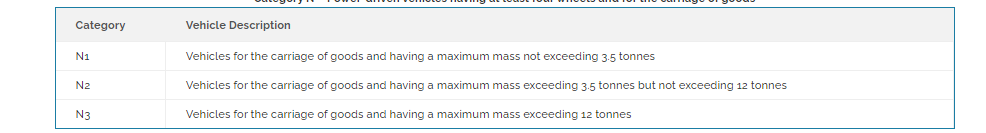
<br>
Vehicles Category N1—Weight Classes<br>
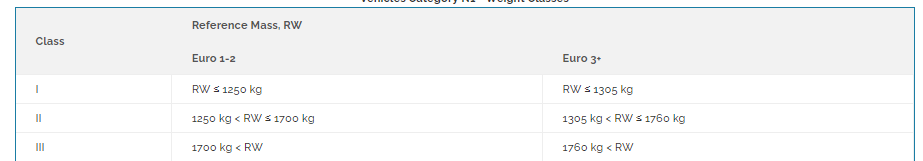<br><br>
**CATEGORY: L**<br>
	Motor vehicles with less than four wheels [but does include light four-wheelers]<br>
    ![image-2.png](attachment:image-2.png)




**CATEGORY: O**<br>
Trailers (including semi–trailers)

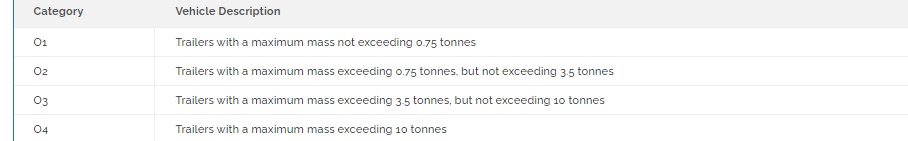



## 3- Data collection

We are using for our analysis two datasets, the first dataset name is [Gekentekende_voertuigen](https://opendata.rdw.nl/Voertuigen/Open-Data-RDW-Gekentekende_voertuigen/m9d7-ebf2) (Registered_vehicles), and the second is [Gekentekende_voertuigen_brandstof](https://opendata.rdw.nl/Voertuigen/Open-Data-RDW-Gekentekende_voertuigen_brandstof/8ys7-d773)(Registered_vehicles_fuel).<br>
Those datasets are provided from RDW( [Rijksdienst voor het Wegverkeer](https://opendata.rdw.nl/)) (Road Traffic Department).<br>

The dataset is licensed under Creative Commons Zero. As part of Creative Commons Zero.<br>

The RDW website has different formats for the datasets(Export as (CSV, Excel,etc..),API), I used CSV files.<br>

Problems encountered and possible solutions:<br>
- The dataset is too large which could take a long time to load from API unless you're going to filter/search API is faster, but since this research need all the dataset it's better to export it as a CSV file and just read it.<br>
- The dataset does not separate the hybrid and electric car, It's just saved as electric this problem could be solved by checking the column of CO2 emission if the car is electric the row will be zero since the electric car doesn't emit CO2.

## 4- Load data

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import statsmodels
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.cluster import MiniBatchKMeans, KMeans
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [2]:
#    from google.colab import drive
#    drive.mount('/content/drive/')

In [3]:
#  cd drive/MyDrive/Fontys/S4/Challenges/classify impacts of cars on climate

Loading Data

In [4]:
col_list = ["Kenteken", "Voertuigsoort","Merk",'Handelsbenaming',"Aantal zitplaatsen","Aantal cilinders","Massa ledig voertuig","Aantal deuren",
            "Europese voertuigcategorie","Technische max. massa voertuig"]
Registered_vehicles=pd.read_csv('Open_Data_RDW__Gekentekende_voertuigen.csv',usecols=col_list)




col_list = ["Kenteken","Brandstof omschrijving","Brandstofverbruik buiten de stad","Brandstofverbruik gecombineerd",
            "Brandstofverbruik stad","CO2 uitstoot gecombineerd"]
Registered_vehicles_fuel=pd.read_csv('Open_Data_RDW__Gekentekende_voertuigen_brandstof.csv',usecols=col_list)

## 5- Data Understanding

First, I will print the shapes of our datasets and print the first 5 rows and check if we have duplicated rows, Then print the types of data to see what we are dealing with

In [5]:
print(' dataset shape: {}'.format(Registered_vehicles.shape))
Registered_vehicles.head()

 dataset shape: (14359160, 10)


,Kenteken,Voertuigsoort,Merk,Handelsbenaming,Aantal zitplaatsen,Aantal cilinders,Massa ledig voertuig,Aantal deuren,Europese voertuigcategorie,Technische max. massa voertuig
0,GS589N,Personenauto,NISSAN,NISSAN ALMERA,5.0,4.0,1226.0,4.0,M1,1710.0
1,2TDZ45,Personenauto,SEAT,LEON,5.0,4.0,1160.0,5.0,M1,1730.0
2,56NNFB,Personenauto,FIAT,FIAT PUNTO,5.0,4.0,835.0,2.0,M1,1370.0
3,20SGRP,Personenauto,BMW,3ER REIHE,4.0,6.0,1550.0,2.0,M1,1995.0
4,89TZPK,Personenauto,MINI,MINI COOPER S,4.0,4.0,1215.0,2.0,M1,1640.0


In [6]:
Registered_vehicles.dtypes

Kenteken                           object
Voertuigsoort                      object
Merk                               object
Handelsbenaming                    object
Aantal zitplaatsen                float64
Aantal cilinders                  float64
Massa ledig voertuig              float64
Aantal deuren                     float64
Europese voertuigcategorie         object
Technische max. massa voertuig    float64
dtype: object

In [7]:
Registered_vehicles.describe()

,Aantal zitplaatsen,Aantal cilinders,Massa ledig voertuig,Aantal deuren,Technische max. massa voertuig
count,1.141328e+07,1.229534e+07,1.393472e+07,1.291778e+07,1.370538e+07
mean,4.348436e+00,3.592200e+00,1.265088e+03,2.705507e+00,2.388887e+03
std,1.776908e+00,1.247446e+00,1.585481e+03,1.871985e+00,5.105317e+03
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,3.000000e+00,8.300000e+02,0.000000e+00,1.320000e+03
50%,5.000000e+00,4.000000e+00,1.090000e+03,4.000000e+00,1.675000e+03
75%,5.000000e+00,4.000000e+00,1.382000e+03,4.000000e+00,2.010000e+03
max,2.020000e+02,9.200000e+01,9.999900e+04,9.000000e+00,9.999900e+04


In [8]:
Registered_vehicles.duplicated(subset='Kenteken').sum()

0

In [9]:
print(' dataset shape: {}'.format(Registered_vehicles_fuel.shape))
Registered_vehicles_fuel.head()

 dataset shape: (13650842, 6)


,Kenteken,Brandstof omschrijving,Brandstofverbruik buiten de stad,Brandstofverbruik gecombineerd,Brandstofverbruik stad,CO2 uitstoot gecombineerd
0,VFZ09K,Diesel,7.4,7.3,7.1,191.0
1,25MLST,Benzine,NaN,NaN,NaN,NaN
2,H655LS,Benzine,4.8,6.3,9.1,150.0
3,VDN70V,Benzine,NaN,NaN,NaN,NaN
4,10MLSX,Benzine,NaN,NaN,NaN,NaN


In [10]:
Registered_vehicles_fuel.dtypes

Kenteken                             object
Brandstof omschrijving               object
Brandstofverbruik buiten de stad    float64
Brandstofverbruik gecombineerd      float64
Brandstofverbruik stad              float64
CO2 uitstoot gecombineerd           float64
dtype: object

In [11]:
Registered_vehicles_fuel.describe()

,Brandstofverbruik buiten de stad,Brandstofverbruik gecombineerd,Brandstofverbruik stad,CO2 uitstoot gecombineerd
count,8.689929e+06,8.822610e+06,8.690352e+06,9.058195e+06
mean,4.949092e+00,5.827283e+00,7.395133e+00,1.402199e+02
std,1.181519e+00,1.656149e+00,2.494889e+00,4.240628e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,4.100000e+00,4.600000e+00,5.500000e+00,1.090000e+02
50%,4.800000e+00,5.600000e+00,7.000000e+00,1.340000e+02
75%,5.600000e+00,6.700000e+00,8.700000e+00,1.630000e+02
max,6.100000e+01,9.360000e+01,9.758000e+01,9.990000e+02


In [12]:
Registered_vehicles_fuel.duplicated(subset='Kenteken').sum()

621923

**I see here that the data format and types are good, but we have the column names in dutch which need to be renamed in English also I see that the data has some null values which need to be deleted or filled, And we have duplicated rows (licenses) in the second dataset(Registered_vehicles_fuel), We see also that some values in the data are in dutch, the main two columns that I will use to analyze and predict will be the CO2 emission combined and the fuel consumption, Eu car category, and fuel description**

## 6- Data Preparation

First, I will rename the dataset columns into English

In [13]:
#col_list = ["License_plate", "Vehicle_type","Brand","number_of_seats","Amount_of_cilinders","Mass_of_empty_vehicle","number_of_doors",
#"European_vehicle_category","Technical_max_vehicle_mass"]
Registered_vehicles.columns=["License_plate","Vehicle_type","Brand",'Trade name',"number_of_seats","Amount_of_cilinders","Mass_of_empty_vehicle","number_of_doors","European_vehicle_category","Technical_max_vehicle_mass"]




#col_list = ["License_plate", "Fuel_sequence_number","Fuel_description","Out_of_town_fuel_consumption","Fuel_consumption_combined",
#           "City_fuel_consumption","CO2_emissions_combined","Weighted_CO2_emissions","Class_hybrid_electric_vehicle"]

Registered_vehicles_fuel.columns=["License_plate", "Fuel_description","Out_of_town_fuel_consumption","Fuel_consumption_combined","City_fuel_consumption","CO2_emissions_combined"]


Now before I join the tables I will check if we have null values in the license plate because I'm going to join on it 

In [14]:
Registered_vehicles.isnull().sum()

License_plate                       0
Vehicle_type                        0
Brand                             532
Trade name                     235305
number_of_seats               2945885
Amount_of_cilinders           2063821
Mass_of_empty_vehicle          424441
number_of_doors               1441381
European_vehicle_category        2536
Technical_max_vehicle_mass     653784
dtype: int64

In [15]:
Registered_vehicles_fuel.isnull().sum()

License_plate                         0
Fuel_description                      0
Out_of_town_fuel_consumption    4960913
Fuel_consumption_combined       4828232
City_fuel_consumption           4960490
CO2_emissions_combined          4592647
dtype: int64

**Since I will use the Fuel_consumption_combined  and CO2_emissions_combined because it is the main aspect to classify the cars I will delete all the rows that it's null so that we don't classify a car as the eco-environment because the values are null, I will also delete the European_vehicle_category null values because we will classify cars per category**

In [16]:
Registered_vehicles = Registered_vehicles[Registered_vehicles['European_vehicle_category'].notna()]

Registered_vehicles_fuel = Registered_vehicles_fuel[Registered_vehicles_fuel['Fuel_consumption_combined'].notna()]
Registered_vehicles_fuel = Registered_vehicles_fuel[Registered_vehicles_fuel['CO2_emissions_combined'].notna()]

**Now I will delete the duplicated value in the second dataset(Registered_vehicles_fuel)**

In [17]:
Registered_vehicles_fuel['License_plate'].drop_duplicates(keep='last',inplace=True)

**Now I will join the two tables, to have all the information needed in one table, We will use the license plate column to merge on.**

In [18]:
df=pd.merge(Registered_vehicles,Registered_vehicles_fuel,on='License_plate')

In [19]:
import gc
del Registered_vehicles
del Registered_vehicles_fuel
gc.collect()

120

In [20]:
df.head()

,License_plate,Vehicle_type,Brand,Trade name,number_of_seats,Amount_of_cilinders,Mass_of_empty_vehicle,number_of_doors,European_vehicle_category,Technical_max_vehicle_mass,Fuel_description,Out_of_town_fuel_consumption,Fuel_consumption_combined,City_fuel_consumption,CO2_emissions_combined
0,GS589N,Personenauto,NISSAN,NISSAN ALMERA,5.0,4.0,1226.0,4.0,M1,1710.0,Benzine,5.5,6.7,8.7,160.0
1,2TDZ45,Personenauto,SEAT,LEON,5.0,4.0,1160.0,5.0,M1,1730.0,Diesel,3.0,3.2,3.8,85.0
2,56NNFB,Personenauto,FIAT,FIAT PUNTO,5.0,4.0,835.0,2.0,M1,1370.0,Benzine,4.8,5.7,7.3,136.0
3,20SGRP,Personenauto,BMW,3ER REIHE,4.0,6.0,1550.0,2.0,M1,1995.0,Benzine,7.7,9.8,13.5,236.0
4,89TZPK,Personenauto,MINI,MINI COOPER S,4.0,4.0,1215.0,2.0,M1,1640.0,Benzine,7.1,8.8,11.8,211.0


**Now we will check how many null values do we have in the combined dataset and what should we delete and what can we fill**

In [21]:
df.isnull().sum()

License_plate                        0
Vehicle_type                         0
Brand                                0
Trade name                         639
number_of_seats                   1953
Amount_of_cilinders                351
Mass_of_empty_vehicle                0
number_of_doors                  63169
European_vehicle_category            0
Technical_max_vehicle_mass         818
Fuel_description                     0
Out_of_town_fuel_consumption    130650
Fuel_consumption_combined            0
City_fuel_consumption           130389
CO2_emissions_combined               0
dtype: int64

We still have some null values but we will not use them for our study it's just an extra information.
I will mkae sure that the data is right byl searching my car license in the dataset to see if the info is correct

In [22]:
print(' dataset shape: {}'.format(df.shape))
df.loc[df['License_plate'] == '85TJRG']

 dataset shape: (8808932, 15)


,License_plate,Vehicle_type,Brand,Trade name,number_of_seats,Amount_of_cilinders,Mass_of_empty_vehicle,number_of_doors,European_vehicle_category,Technical_max_vehicle_mass,Fuel_description,Out_of_town_fuel_consumption,Fuel_consumption_combined,City_fuel_consumption,CO2_emissions_combined
445645,85TJRG,Personenauto,CHEVROLET,MATIZ,5.0,3.0,750.0,4.0,M1,1250.0,Benzine,4.2,5.2,6.9,127.0


Okay everything seems right, Now I want to group by fuel description to see what types of fuels do we have

In [23]:
df['Fuel_description'].value_counts()

Benzine          7132832
Diesel           1592486
LPG                68246
CNG                11816
Alcohol             3515
Elektriciteit         24
LNG                   10
Waterstof              3
Name: Fuel_description, dtype: int64

We see that the majority of cars run on Benzine

In [24]:
# I will check here the electric cars to see if we need to classify them 
df.loc[df['Fuel_description'] == 'Elektriciteit']

,License_plate,Vehicle_type,Brand,Trade name,number_of_seats,Amount_of_cilinders,Mass_of_empty_vehicle,number_of_doors,European_vehicle_category,Technical_max_vehicle_mass,Fuel_description,Out_of_town_fuel_consumption,Fuel_consumption_combined,City_fuel_consumption,CO2_emissions_combined
317780,HB221B,Personenauto,MERCEDES-BENZ,S 400 HYBRID,5.0,6.0,1855.0,4.0,M1,2550.0,Elektriciteit,6.3,7.90,10.7,186.0
967773,86KPJ3,Personenauto,MERCEDES-BENZ,S 400 HYBRID,5.0,6.0,1855.0,4.0,M1,2550.0,Elektriciteit,6.5,8.10,10.9,189.0
1002758,NZ882V,Personenauto,TOYOTA,TOYOTA AURIS,5.0,4.0,1285.0,4.0,M1,1815.0,Elektriciteit,NaN,3.90,NaN,91.0
1378135,44LHZ9,Personenauto,MERCEDES-BENZ,S 400 HYBRID,5.0,6.0,1920.0,4.0,M1,2600.0,Elektriciteit,6.5,8.10,10.9,190.0
1704333,4ZKX98,Personenauto,LEXUS,LEXUS RX450H,5.0,6.0,2085.0,4.0,M1,2700.0,Elektriciteit,6.0,6.30,6.5,145.0
1886671,HX170J,Personenauto,MERCEDES-BENZ,S 400 HYBRID,5.0,6.0,1855.0,4.0,M1,2550.0,Elektriciteit,6.3,7.90,10.7,186.0
1954491,RF273V,Personenauto,TOYOTA,TOYOTA PRIUS,5.0,4.0,1400.0,4.0,M1,1721.0,Elektriciteit,NaN,4.91,NaN,117.0
2007902,51ZDJ3,Personenauto,TOYOTA,TOYOTA PRIUS,5.0,4.0,1340.0,4.0,M1,1805.0,Elektriciteit,3.8,4.00,4.0,92.0
2322672,33JKP8,Personenauto,MERCEDES-BENZ,S 400 HYBRID,5.0,6.0,1920.0,4.0,M1,2600.0,Elektriciteit,6.4,8.00,10.8,188.0
3180894,JP808X,Personenauto,TOYOTA,TOYOTA YARIS HYBRID,5.0,4.0,1060.0,4.0,M1,1565.0,Elektriciteit,NaN,3.60,NaN,82.0


**We can see that all the electric car is not only electric but hybrid so we need to keep the hybrid and delete the electic because it's not relevant to our study since it has 0 CO2 emissions and we need to find fuel cars that use the minimal CO2, So I will delete them,but of course that you noticed that we already delete all columns that doesnt have CO2 emission and electric cars is from them,but since I said that my research will help people with buying cheap fuel cars that have low emission unfortunately hybrid cars can not be listed because the minimum price of hybrid cars start 20000 Euro so I will exclude them from my research**

In [25]:
df = df[df.Fuel_description != "Elektriciteit"]

In [26]:
df.dtypes

License_plate                    object
Vehicle_type                     object
Brand                            object
Trade name                       object
number_of_seats                 float64
Amount_of_cilinders             float64
Mass_of_empty_vehicle           float64
number_of_doors                 float64
European_vehicle_category        object
Technical_max_vehicle_mass      float64
Fuel_description                 object
Out_of_town_fuel_consumption    float64
Fuel_consumption_combined       float64
City_fuel_consumption           float64
CO2_emissions_combined          float64
dtype: object

In [27]:
df['CO2_emissions_combined']=df['CO2_emissions_combined'].astype('int')

In [28]:
df.describe()

,number_of_seats,Amount_of_cilinders,Mass_of_empty_vehicle,number_of_doors,Technical_max_vehicle_mass,Out_of_town_fuel_consumption,Fuel_consumption_combined,City_fuel_consumption,CO2_emissions_combined
count,8.806955e+06,8.808557e+06,8.808908e+06,8.745739e+06,8.808090e+06,8.678266e+06,8.808908e+06,8.678527e+06,8.808908e+06
mean,4.709003e+00,3.822197e+00,1.208043e+03,3.491754e+00,1.796578e+03,4.947297e+00,5.825192e+00,7.390567e+00,1.391536e+02
std,8.895015e-01,7.255544e-01,3.470386e+02,1.373422e+00,4.774387e+02,1.177525e+00,1.649287e+00,2.486209e+00,4.071561e+01
min,1.000000e+00,0.000000e+00,5.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
25%,4.000000e+00,3.000000e+00,9.600000e+02,4.000000e+00,1.495000e+03,4.100000e+00,4.600000e+00,5.500000e+00,1.090000e+02
50%,5.000000e+00,4.000000e+00,1.170000e+03,4.000000e+00,1.740000e+03,4.800000e+00,5.600000e+00,7.000000e+00,1.330000e+02
75%,5.000000e+00,4.000000e+00,1.371000e+03,4.000000e+00,1.975000e+03,5.600000e+00,6.700000e+00,8.700000e+00,1.620000e+02
max,1.090000e+02,1.700000e+01,7.336000e+03,7.000000e+00,1.138500e+04,6.100000e+01,9.360000e+01,9.758000e+01,9.900000e+02


**I noticed here that there is cars with fuel consumption combined equal to 0 which is strange since we already deleted all electric cars so I will investigate more below**

In [29]:
df[df['Fuel_consumption_combined'] == df['Fuel_consumption_combined'].min()]

,License_plate,Vehicle_type,Brand,Trade name,number_of_seats,Amount_of_cilinders,Mass_of_empty_vehicle,number_of_doors,European_vehicle_category,Technical_max_vehicle_mass,Fuel_description,Out_of_town_fuel_consumption,Fuel_consumption_combined,City_fuel_consumption,CO2_emissions_combined
35312,3VPF62,Bedrijfsauto,TOYOTA,TUNDRA 4X2,5.0,8.0,2559.0,NaN,N1,3175.0,LPG,NaN,0.0,NaN,363
51806,VN742X,Bedrijfsauto,DODGE,RAM 1500,5.0,8.0,2504.0,NaN,N1,3129.0,LPG,NaN,0.0,NaN,353
246212,3KNL24,Personenauto,AUDI,AUDI A2,4.0,4.0,870.0,4.0,M1,1410.0,Benzine,2.7,0.0,0.0,145
328368,VN392X,Bedrijfsauto,FORD,F 150,5.0,8.0,2453.0,NaN,N1,3175.0,LPG,NaN,0.0,NaN,310
744512,VN278P,Bedrijfsauto,DODGE,DODGE RAM 1500 SLT,5.0,6.0,2371.0,NaN,N1,3085.0,LPG,NaN,0.0,NaN,293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8545757,VL881N,Bedrijfsauto,CADILLAC,ESCALADE,2.0,8.0,2664.0,NaN,N1,3357.0,LPG,NaN,0.0,NaN,339
8617827,VL936J,Bedrijfsauto,DODGE,DODGE RAM 1500 LARAMIE,5.0,8.0,2723.0,NaN,N1,3500.0,LPG,NaN,0.0,NaN,358
8630179,41ZRD3,Personenauto,MAZDA,MAZDA 2,5.0,4.0,996.0,4.0,M1,1485.0,Benzine,0.0,0.0,0.0,102
8631795,VN280P,Bedrijfsauto,DODGE,DODGE RAM 1500 SLT,5.0,6.0,2371.0,NaN,N1,3085.0,LPG,NaN,0.0,NaN,293


**So we have cars that doesn't have a fuel consumption combined, previously when we deleted the null values I did not make sure that we could have null values but saved as 0, so I will delete them now**

In [30]:
df= df[df['Fuel_consumption_combined'] != 0]

**The data have a lot of duplicate and null values, I deleted all the values that will be used by the algorithm to analyze and predict,I merged the data by the license plate, And now the data is clean and ready for analyzing and predicting**

## 7-Analysing and visualising data 

**I will check here how many cars do we have per fuel type**

In [31]:
df['Fuel_description'].value_counts()

Benzine      7132827
Diesel       1592486
LPG            68185
CNG            11816
Alcohol         3515
LNG               10
Waterstof          3
Name: Fuel_description, dtype: int64

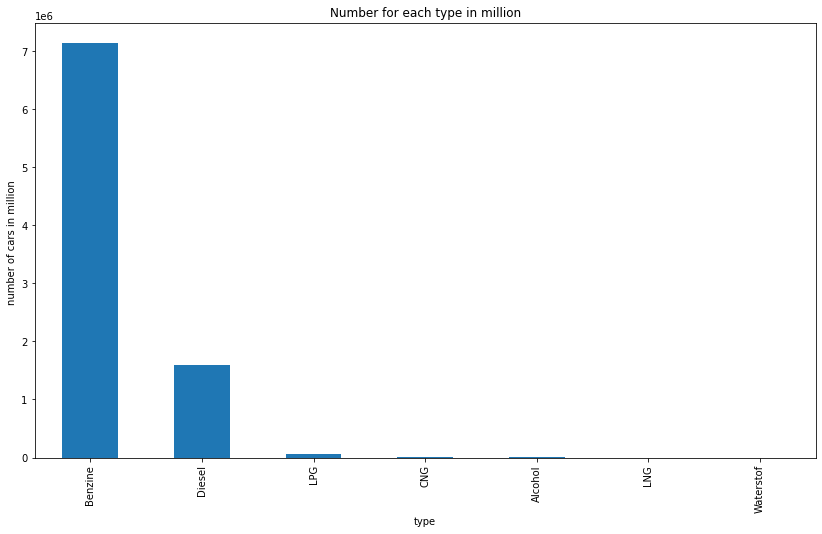

In [32]:
ax=df['Fuel_description'].value_counts().plot(kind='bar',title="Number for each type in million", figsize=(14,8),xlabel='type',ylabel='number of cars in million ')


**I will check here how many Eu cars categories do we have in the dataset**

In [33]:
df.groupby('European_vehicle_category').count()

,License_plate,Vehicle_type,Brand,Trade name,number_of_seats,Amount_of_cilinders,Mass_of_empty_vehicle,number_of_doors,Technical_max_vehicle_mass,Fuel_description,Out_of_town_fuel_consumption,Fuel_consumption_combined,City_fuel_consumption,CO2_emissions_combined
European_vehicle_category,,,,,,,,,,,,,,
L1,51352,51352,51352,51164,51352,51352,51352,50717,50717,51352,0,51352,0,51352
L3,615,615,615,615,615,615,615,473,473,615,0,615,0,615
L5,364,364,364,364,364,364,364,364,364,364,0,364,0,364
M1,8117903,8117903,8117903,8117711,8115953,8117603,8117903,8117776,8117863,8117903,8050074,8117903,8050290,8117903
M2,29,29,29,29,29,29,29,20,29,29,29,29,29,29
M3,4,4,4,4,4,4,4,3,4,4,4,4,4,4
N1,635134,635134,635134,634875,635133,635083,635134,575357,635133,635134,624986,635134,625027,635134
N2,3441,3441,3441,3441,3439,3441,3441,1013,3441,3441,3170,3441,3174,3441


Text(0, 0.5, 'CO2 emissions combined')

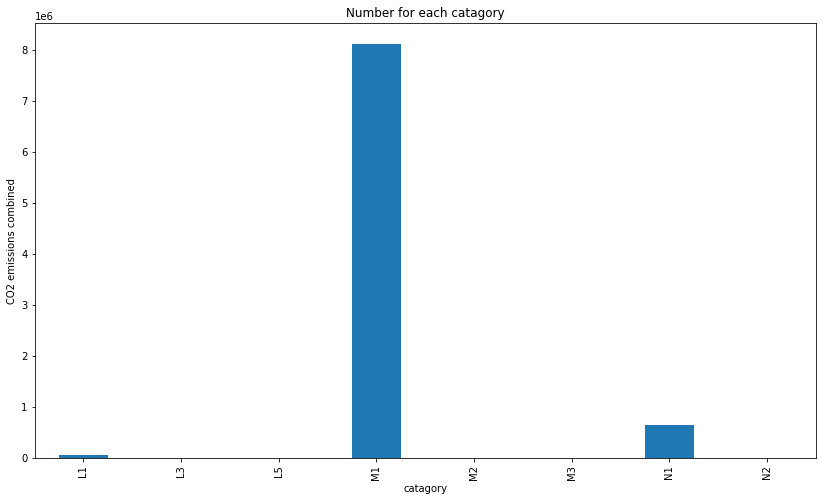

In [34]:

ax = df.groupby('European_vehicle_category')['CO2_emissions_combined'].count().plot.bar(title="Number for each catagory", figsize=(14,8))
ax.set_xlabel('catagory')
ax.set_ylabel('CO2 emissions combined')

**I will check here how many Eu cars categories per fuel type do we have in the dataset**

In [35]:
df.groupby(['Fuel_description', 'European_vehicle_category']).size()

Fuel_description  European_vehicle_category
Alcohol           M1                              3512
                  N1                                 3
Benzine           L1                             51352
                  L3                               615
                  L5                               364
                  M1                           7070648
                  N1                              9844
                  N2                                 4
CNG               M1                              8824
                  N1                              2971
                  N2                                21
Diesel            M1                            967258
                  M2                                29
                  M3                                 4
                  N1                            621782
                  N2                              3413
LNG               M1                                 9
                  N1 

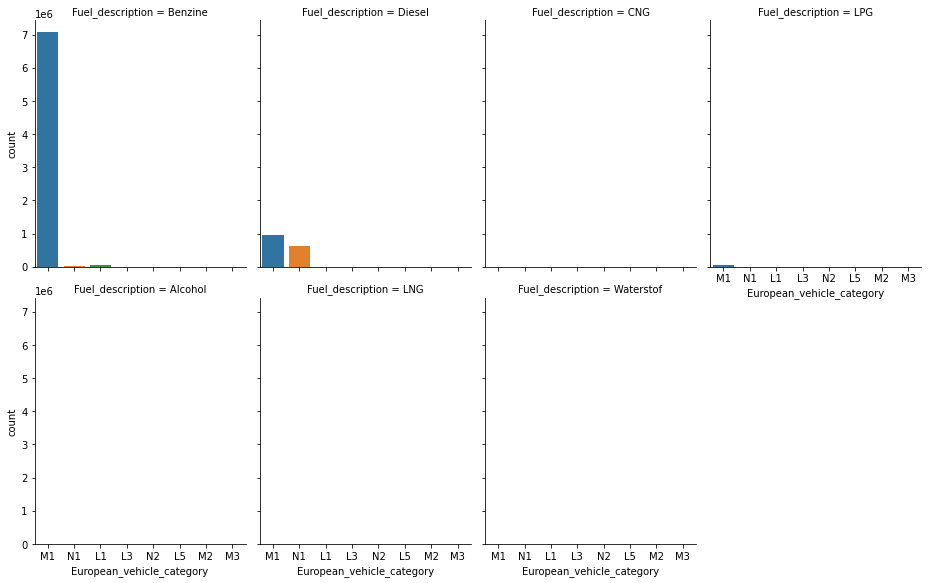

In [36]:
sns.catplot(data=df,kind='count',x='European_vehicle_category',col='Fuel_description',col_wrap=4, height=4, aspect=.8)

**Now I will create a box plot to see if we can classify cars by the CO2 emission or by fuel consumption and to see what can we understand from the patterns and to see the outliers**

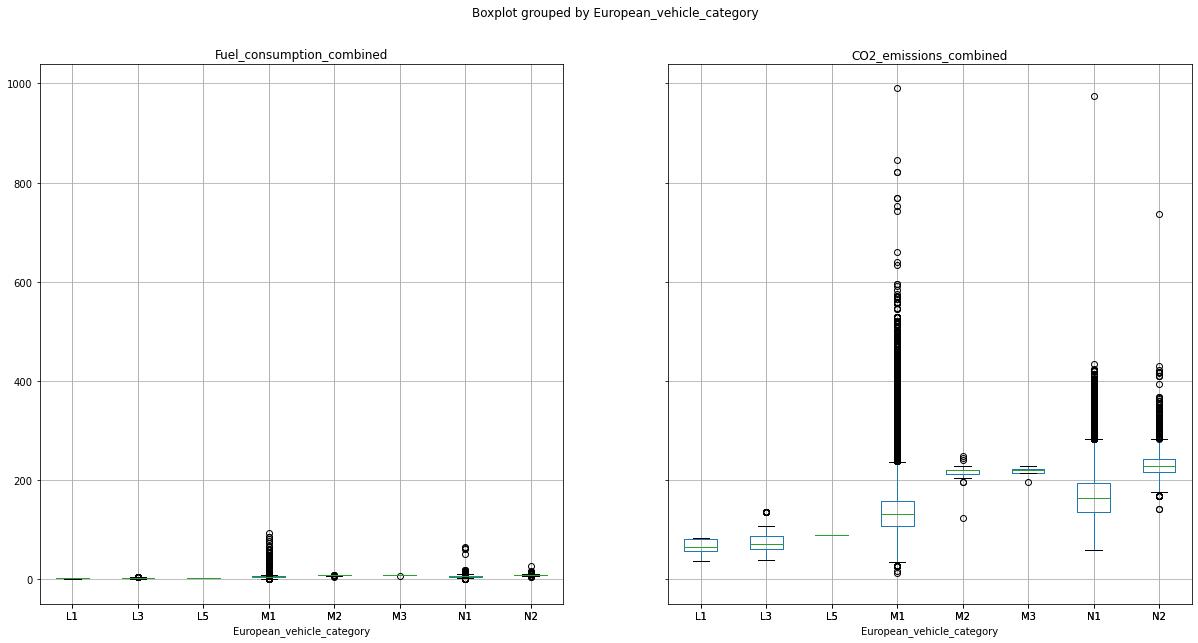

In [37]:
df_features = tuple(df.columns[[12,14]].values)
df.boxplot(column=df_features, by='European_vehicle_category', figsize=(20,10), layout=(1,2));

**I will create another two boxplots one for the CO2 emission and the other for fuel consumption and plot them per Eu category to see if could see clear relations between them**

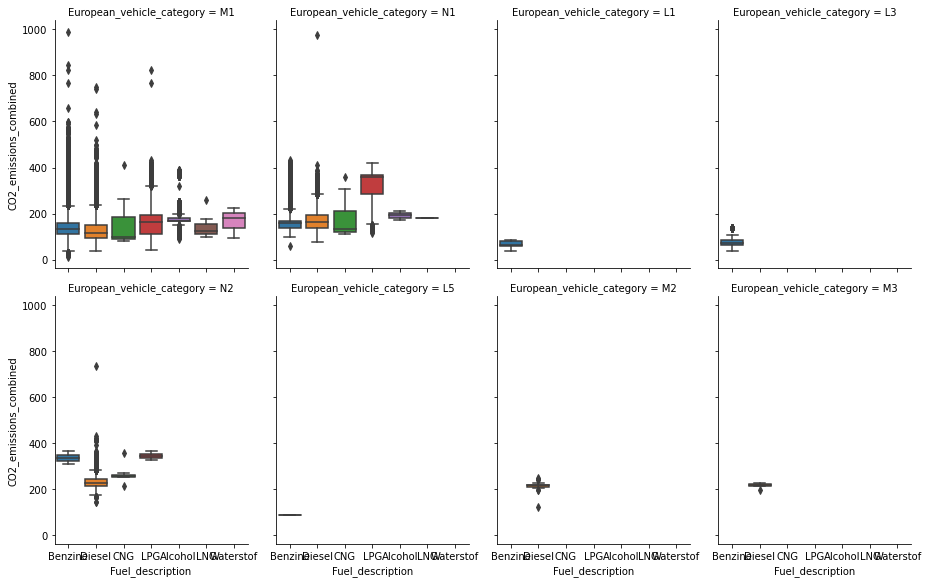

In [38]:
g = sns.catplot(x='Fuel_description', y="CO2_emissions_combined",col_wrap=4, col="European_vehicle_category", data=df, kind="box", height=4, aspect=.8);


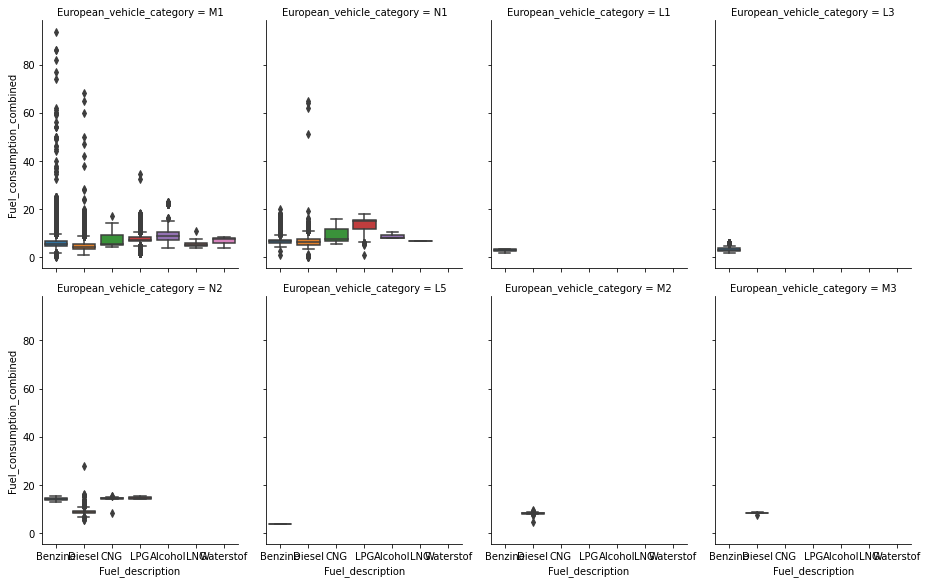

In [39]:
g = sns.catplot(x='Fuel_description', y="Fuel_consumption_combined",col_wrap=4, col="European_vehicle_category", data=df, kind="box", height=4, aspect=.8);


**we can conclude from those diagrams that there is a lot of inconsistency (outliers) and that we see that a lot of cars have huge fuel consumption and co2 emission on the other hand we can see from now that we do have average cars that could be used and classified as eco-friendly cars instead of non-eco-friendly cars**

## 8. Data Munging

### 8.1. Transform the Data

In [40]:
df['fuel_number'] = df['Fuel_description'].map( {'Benzine': 1, 'LPG': 2, 'Diesel': 3,'LNG':4,'Waterstof':5,'CNG':6,'Alcohol':7} ).astype(int)
df['eu_ctagory_number'] = df['European_vehicle_category'].map( {'L1': 1, 'L3': 2, 'L5': 3,'M1':4,'M2':5,'M3':6,'N1':7,'N2':8} ).astype(int)

### 8.2. Hot Encoding

Hot Encoding, We have a categorical feature attribute: Fuel_description, European_vehicle_category that we need to change to numbers and split each category in a separate column so we don't get a biased result 

In [41]:
df['Benzine'] = df['Fuel_description'].map( {'Benzine': 1, 'LPG': 0, 'Diesel': 0,'LNG':0,'Waterstof':0,'CNG':0,'Alcohol':0} ).astype(int)
df['LPG'] = df['Fuel_description'].map( {'Benzine': 0, 'LPG': 1, 'Diesel': 0,'LNG':0,'Waterstof':0,'CNG':0,'Alcohol':0} ).astype(int)
df['Diesel'] = df['Fuel_description'].map( {'Benzine': 0, 'LPG': 0, 'Diesel': 1,'LNG':0,'Waterstof':0,'CNG':0,'Alcohol':0} ).astype(int)
df['LNG'] = df['Fuel_description'].map( {'Benzine': 0, 'LPG': 0, 'Diesel': 0,'LNG':1,'Waterstof':0,'CNG':0,'Alcohol':0} ).astype(int)
df['Waterstof'] = df['Fuel_description'].map( {'Benzine': 0, 'LPG': 0, 'Diesel': 0,'LNG':0,'Waterstof':1,'CNG':0,'Alcohol':0} ).astype(int)
df['CNG'] = df['Fuel_description'].map( {'Benzine': 0, 'LPG': 0, 'Diesel': 0,'LNG':0,'Waterstof':0,'CNG':1,'Alcohol':0} ).astype(int)
df['Alcohol'] = df['Fuel_description'].map( {'Benzine': 0, 'LPG': 0, 'Diesel': 0,'LNG':0,'Waterstof':0,'CNG':0,'Alcohol':1} ).astype(int)


df['L1'] = df['European_vehicle_category'].map( {'L1': 1, 'L3': 0, 'L5': 0,'M1':0,'M2':0,'M3':0,'N1':0,'N2':0} ).astype(int)
df['L3'] = df['European_vehicle_category'].map( {'L1': 0, 'L3': 1, 'L5': 0,'M1':0,'M2':0,'M3':0,'N1':0,'N2':0} ).astype(int)
df['L5'] = df['European_vehicle_category'].map( {'L1': 0, 'L3': 0, 'L5': 1,'M1':0,'M2':0,'M3':0,'N1':0,'N2':0} ).astype(int)
df['M1'] = df['European_vehicle_category'].map( {'L1': 0, 'L3': 0, 'L5': 0,'M1':1,'M2':0,'M3':0,'N1':0,'N2':0} ).astype(int)
df['M2'] = df['European_vehicle_category'].map( {'L1': 0, 'L3': 0, 'L5': 0,'M1':0,'M2':1,'M3':0,'N1':0,'N2':0} ).astype(int)
df['M3'] = df['European_vehicle_category'].map( {'L1': 0, 'L3': 0, 'L5': 0,'M1':0,'M2':0,'M3':1,'N1':0,'N2':0} ).astype(int)
df['N1'] = df['European_vehicle_category'].map( {'L1': 0, 'L3': 0, 'L5': 0,'M1':0,'M2':0,'M3':0,'N1':1,'N2':0} ).astype(int)
df['N2'] = df['European_vehicle_category'].map( {'L1': 0, 'L3': 0, 'L5': 0,'M1':0,'M2':0,'M3':0,'N1':0,'N2':1} ).astype(int)

### 8.3. Check missing Values

In [42]:
df.isna().sum()

License_plate                        0
Vehicle_type                         0
Brand                                0
Trade name                         639
number_of_seats                   1953
Amount_of_cilinders                351
Mass_of_empty_vehicle                0
number_of_doors                  63119
European_vehicle_category            0
Technical_max_vehicle_mass         818
Fuel_description                     0
Out_of_town_fuel_consumption    130579
Fuel_consumption_combined            0
City_fuel_consumption           130318
CO2_emissions_combined               0
fuel_number                          0
eu_ctagory_number                    0
Benzine                              0
LPG                                  0
Diesel                               0
LNG                                  0
Waterstof                            0
CNG                                  0
Alcohol                              0
L1                                   0
L3                       

The columns the we are going to use them hav 0 cull values 

## 9- Selecting the features

I will use Fuel_consumption_combined, CO2_emissions_combined, Fuel_consumption_combined and CO2_emissions_combined to determine the cars echo-friendly number(from 1 to 10)

In [43]:
df.shape

(8808842, 32)

In [44]:
# here I will try to make the classification with using hot encoding
x_df=df[['Benzine','LPG','Diesel','LNG','Waterstof','CNG','Alcohol','L1','L3','L5','M1','M2','M3','N1','N2','Fuel_consumption_combined','CO2_emissions_combined']]

# here I will try to make the classification without using hot encoding
x_df_without_hot_encoding=df[['fuel_number','eu_ctagory_number','Fuel_consumption_combined','CO2_emissions_combined']]

# here I will try to make the classification after normalization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(x_df)

In [45]:
x_df.head()

,Benzine,LPG,Diesel,LNG,Waterstof,CNG,Alcohol,L1,L3,L5,M1,M2,M3,N1,N2,Fuel_consumption_combined,CO2_emissions_combined
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,6.7,160
1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,3.2,85
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5.7,136
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,9.8,236
4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,8.8,211


In [46]:
scaled_features

array([[ 0.48473916, -0.08832271, -0.46976303, ..., -0.01976823,
         0.53041184,  0.51206336],
       [-2.06296517, -0.08832271,  2.12873286, ..., -0.01976823,
        -1.59180818, -1.3301047 ],
       [ 0.48473916, -0.08832271, -0.46976303, ..., -0.01976823,
        -0.07593674, -0.07743042],
       ...,
       [ 0.48473916, -0.08832271, -0.46976303, ..., -0.01976823,
         1.13676041,  1.1998061 ],
       [-2.06296517, -0.08832271,  2.12873286, ..., -0.01976823,
         0.10596783,  0.43837663],
       [ 0.48473916, -0.08832271, -0.46976303, ..., -0.01976823,
        -0.86418989, -0.88798437]])

## 10-Training Machine learning algorithm and predicting 

I will first start  MiniBatchKMeans and check the result then I will scale the data and perform the same algorithms to see the difference,I will also try the algorithm without hot encoding

Showing the Maximum and minimum of fuel consumption and CO2 to help us later to compare the result 

In [47]:
print('fuel consumption min:',df['Fuel_consumption_combined'].min(),'fuel consumption max:',df['Fuel_consumption_combined'].max())
print(' Co2 min:',df['CO2_emissions_combined'].min(),'Co2 max:',df['CO2_emissions_combined'].max())

fuel consumption min: 0.2 fuel consumption max: 93.6
 Co2 min: 12 Co2 max: 990


**The effect of the initial cluster centroids**

In [48]:
# for n in range (20):
#     mbk = MiniBatchKMeans(n_clusters=10, random_state=n)
#     mbk.fit(x_df)
#     print('Random state = ',n,'\tNr iterations',mbk.n_iter_,'\tSum of squared distances ',mbk.inertia_)

**So I will choose the minimum inertia: Random state =  12 	Nr iterations 17 	Sum of squared distances  380626823.54407,**

**I will comment this code since I already execute it and got my result because it takes tremendous time.**

**The Elbow method**

In [49]:
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    mbk = MiniBatchKMeans(n_clusters=k, random_state=1,batch_size=3072)
    mbk.fit(x_df)
    Sum_of_squared_distances.append(mbk.inertia_)
    print('Nr clusters',k,'\tSum of squared distances ',mbk.inertia_)

Nr clusters 1 	Sum of squared distances  14629065515.052933
Nr clusters 2 	Sum of squared distances  5354163319.034832
Nr clusters 3 	Sum of squared distances  2841173333.3897324
Nr clusters 4 	Sum of squared distances  1791384786.2536974
Nr clusters 5 	Sum of squared distances  1314824811.2003906
Nr clusters 6 	Sum of squared distances  930311557.2815778
Nr clusters 7 	Sum of squared distances  688648478.7868526
Nr clusters 8 	Sum of squared distances  575726638.3087895
Nr clusters 9 	Sum of squared distances  465382719.79970336
Nr clusters 10 	Sum of squared distances  416202356.5038332


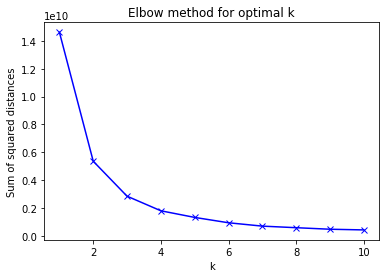

In [50]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal k')
plt.show()

**as we see in the elbow method the best clusters is between 3 and 4  but  my research objectives are to classify them from 1 to 10 for several reasons one of them is to have a variety of choices and to classify cars in a more detailed way ,So I will choose 10 clusters because it has the least sum of squared distance**

### MiniBatchKMeans algorithm
The MiniBatchKMeans is a variant of the KMeans algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function.

In [51]:
mbk  = MiniBatchKMeans(n_clusters=10,random_state=12,batch_size=3072)

In [52]:
mbk  = mbk.fit(x_df)

In [53]:
cluster_centers = mbk.cluster_centers_
print(cluster_centers)

[[8.37612892e-01 1.07136533e-02 1.51319285e-01 0.00000000e+00
  0.00000000e+00 3.54170356e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 9.73968479e-01 0.00000000e+00
  0.00000000e+00 2.60315212e-02 0.00000000e+00 4.53056490e+00
  1.05966619e+02]
 [6.13787701e-01 1.60595378e-02 3.65452409e-01 0.00000000e+00
  0.00000000e+00 4.30865648e-03 3.91696044e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.35213474e-01 0.00000000e+00
  0.00000000e+00 2.60086173e-01 4.70035253e-03 8.53216608e+00
  2.10370153e+02]
 [8.73558801e-01 2.56213169e-03 1.23238534e-01 0.00000000e+00
  0.00000000e+00 3.84319754e-04 2.56213169e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 9.44273636e-01 0.00000000e+00
  0.00000000e+00 5.57263643e-02 0.00000000e+00 5.86869459e+00
  1.39374327e+02]
 [7.17656012e-01 1.52207002e-02 2.60273973e-01 0.00000000e+00
  0.00000000e+00 3.80517504e-03 3.04414003e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 8.34094368e-01 0.00000000e+00
  0.00000000e+00

In [54]:
print(np.unique(mbk.labels_))

[0 1 2 3 4 5 6 7 8 9]


Maximum number of iterations for a single run

In [55]:
print(mbk.n_iter_)

14


Inertia: Intuitively, inertia tells how far away the points within a cluster are. Therefore, a small of inertia is aimed for. The range of inertia’s value starts from zero and goes up.

In [56]:
print(mbk.inertia_)

407780586.9390222


In [57]:
df['Cluster'] = mbk.labels_.astype(int)
df.head(10)

,License_plate,Vehicle_type,Brand,Trade name,number_of_seats,Amount_of_cilinders,Mass_of_empty_vehicle,number_of_doors,European_vehicle_category,Technical_max_vehicle_mass,...,Alcohol,L1,L3,L5,M1,M2,M3,N1,N2,Cluster
0,GS589N,Personenauto,NISSAN,NISSAN ALMERA,5.0,4.0,1226.0,4.0,M1,1710.0,...,0,0,0,0,1,0,0,0,0,7
1,2TDZ45,Personenauto,SEAT,LEON,5.0,4.0,1160.0,5.0,M1,1730.0,...,0,0,0,0,1,0,0,0,0,5
2,56NNFB,Personenauto,FIAT,FIAT PUNTO,5.0,4.0,835.0,2.0,M1,1370.0,...,0,0,0,0,1,0,0,0,0,2
3,20SGRP,Personenauto,BMW,3ER REIHE,4.0,6.0,1550.0,2.0,M1,1995.0,...,0,0,0,0,1,0,0,0,0,3
4,89TZPK,Personenauto,MINI,MINI COOPER S,4.0,4.0,1215.0,2.0,M1,1640.0,...,0,0,0,0,1,0,0,0,0,1
5,NJ731T,Personenauto,OPEL,ASTRA SPORTS TOURER+,5.0,4.0,1212.0,5.0,M1,1885.0,...,0,0,0,0,1,0,0,0,0,0
6,22STV1,Personenauto,PEUGEOT,3008,5.0,4.0,1434.0,4.0,M1,2020.0,...,0,0,0,0,1,0,0,0,0,4
7,VN677N,Bedrijfsauto,VOLKSWAGEN,CADDY,2.0,4.0,1404.0,0.0,N1,2159.0,...,0,0,0,0,0,0,0,1,0,2
8,L216BV,Personenauto,VOLKSWAGEN,T-ROC,5.0,4.0,1247.0,5.0,M1,1860.0,...,0,0,0,0,1,0,0,0,0,8
9,75LVGH,Personenauto,BMW,7ER REIHE,5.0,6.0,1875.0,4.0,M1,2480.0,...,0,0,0,0,1,0,0,0,0,1


**Exploring the result with 1 to see the CO2 and fuel consumption values if it makes sense**

In [58]:
df[['European_vehicle_category','Fuel_consumption_combined','CO2_emissions_combined','Cluster']].loc[(df['Cluster']==1) & (df['Benzine']== 1)]

,European_vehicle_category,Fuel_consumption_combined,CO2_emissions_combined,Cluster
4,M1,8.8,211,1
13,M1,8.6,202,1
51,M1,8.6,205,1
103,M1,9.2,220,1
138,M1,9.0,226,1
...,...,...,...,...
8808620,M1,8.8,211,1
8808655,M1,9.1,218,1
8808681,M1,9.3,223,1
8808734,M1,9.4,225,1


In [59]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 5) )]
print('  min:',df2['CO2_emissions_combined'].min(),'max:',df2['CO2_emissions_combined'].max())


  min: 12 max: 97


In [60]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 6) )]

print('  min:',df2['CO2_emissions_combined'].min(),' max:',df2['CO2_emissions_combined'].max())

  min: 278  max: 990


In [61]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 7) )]
print('  min:',df2['CO2_emissions_combined'].min(),' max:',df2['CO2_emissions_combined'].max())

  min: 148  max: 162


In [62]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 8) )]
print('  min:',df2['CO2_emissions_combined'].min(),' max:',df2['CO2_emissions_combined'].max())

  min: 113  max: 131


In [63]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 9) )]
print('  min:',df2['CO2_emissions_combined'].min(),' max:',df2['CO2_emissions_combined'].max())

  min: 179  max: 199


In [64]:
#Plot the clusters obtained using k means
# fig = plt.figure()
# ax = fig.add_subplot(111)
# scatter = ax.scatter(df['CO2_emissions_combined'],df['Fuel_consumption_combined'],
#                      c=df['Cluster'])
# ax.set_title('MiniBatchKMeans Clustering')
# ax.set_xlabel('CO2_emissions_combined')
# ax.set_ylabel('Fuel_consumption_combined')
# plt.colorbar(scatter)

First, I used this code to plot the clusters but It takes a very long time to execute so I replaced it with the below code which is much faster and has the same result

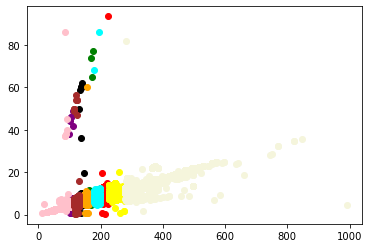

In [65]:
#filter rows of original data
filtered_label0 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 0) )]
filtered_label1 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 1) )]
filtered_label2 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 2) )]
filtered_label3 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 3) )]
filtered_label4 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 4) )]
filtered_label5 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 5) )]
filtered_label6 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 6) )]
filtered_label7 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 7) )]
filtered_label8 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 8) )]
filtered_label9 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 9) )]



#Plotting the results
plt.scatter(filtered_label0['CO2_emissions_combined'] ,filtered_label0['Fuel_consumption_combined'] ,color = 'purple')
plt.scatter(filtered_label1['CO2_emissions_combined'] ,filtered_label1['Fuel_consumption_combined'],color = 'red')
plt.scatter(filtered_label2['CO2_emissions_combined'],filtered_label2['Fuel_consumption_combined'],color = 'black')
plt.scatter(filtered_label3['CO2_emissions_combined'] ,filtered_label3['Fuel_consumption_combined'],color = 'yellow')
plt.scatter(filtered_label4['CO2_emissions_combined'] ,filtered_label4['Fuel_consumption_combined'],color = 'green')
plt.scatter(filtered_label5['CO2_emissions_combined'] ,filtered_label5['Fuel_consumption_combined'],color = 'pink' )
plt.scatter(filtered_label6['CO2_emissions_combined'] ,filtered_label6['Fuel_consumption_combined'] ,color = 'beige')
plt.scatter(filtered_label7['CO2_emissions_combined'] ,filtered_label7['Fuel_consumption_combined'] ,color = 'orange')
plt.scatter(filtered_label8['CO2_emissions_combined'] ,filtered_label8['Fuel_consumption_combined'] ,color = 'brown')
plt.scatter(filtered_label9['CO2_emissions_combined'] ,filtered_label9['Fuel_consumption_combined'],color = 'cyan' )
plt.show()

If we manually compare the result of the first five rows from the category M1 we can see that cars with high CO2 and fuel consumption has a wrong result depending on other cars from the same category M1 ,but when we show the minimum and maximum co2 emission we notice that the data is classified but it's not organized like cluster 1 should have the data of cluster 3 so it's not sorted by cluster number.<br>
**Note:** we have to compare manually because we don't have the data we are generating
<br>
<br>

**Conclusion**<br>
After doing more research about this issue I discovered that This behavior is normal, as the ordering of cluster labels is dependent on the initialization. Cluster 0 from the first run could be labeled cluster 1 in the second run and vice versa. This doesn’t affect clustering evaluation metrics. 

**But know the problem is how to make it organise it from the smaller to the bigger in clustering**

after further investigation and researching I couldn't find  a way to make Kmeans sort the clusters from small to big so I will hot encoding it 


In [66]:
df['soorted_cluster'] = df['Cluster'].map( {0: 1, 9: 2, 4:3 ,6:4,2:5,1:6,7:7,3:8,8:9,5:10} ).astype(int)

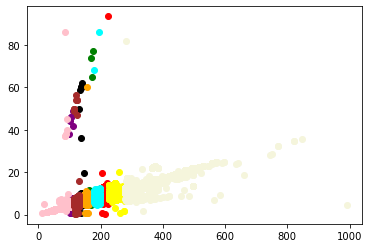

In [67]:
#filter rows of original data
filtered_label0 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 0) )]
filtered_label1 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 1) )]
filtered_label2 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 2) )]
filtered_label3 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 3) )]
filtered_label4 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 4) )]
filtered_label5 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 5) )]
filtered_label6 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 6) )]
filtered_label7 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 7) )]
filtered_label8 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 8) )]
filtered_label9 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 9) )]



#Plotting the results
plt.scatter(filtered_label0['CO2_emissions_combined'] ,filtered_label0['Fuel_consumption_combined'] ,color = 'purple')
plt.scatter(filtered_label1['CO2_emissions_combined'] ,filtered_label1['Fuel_consumption_combined'],color = 'red')
plt.scatter(filtered_label2['CO2_emissions_combined'],filtered_label2['Fuel_consumption_combined'],color = 'black')
plt.scatter(filtered_label3['CO2_emissions_combined'] ,filtered_label3['Fuel_consumption_combined'],color = 'yellow')
plt.scatter(filtered_label4['CO2_emissions_combined'] ,filtered_label4['Fuel_consumption_combined'],color = 'green')
plt.scatter(filtered_label5['CO2_emissions_combined'] ,filtered_label5['Fuel_consumption_combined'],color = 'pink' )
plt.scatter(filtered_label6['CO2_emissions_combined'] ,filtered_label6['Fuel_consumption_combined'] ,color = 'beige')
plt.scatter(filtered_label7['CO2_emissions_combined'] ,filtered_label7['Fuel_consumption_combined'] ,color = 'orange')
plt.scatter(filtered_label8['CO2_emissions_combined'] ,filtered_label8['Fuel_consumption_combined'] ,color = 'brown')
plt.scatter(filtered_label9['CO2_emissions_combined'] ,filtered_label9['Fuel_consumption_combined'],color = 'cyan' )
plt.show()

### MiniBatchKMeans algorithm with scalling 
We still have a wrong result, I will try now first to scle the data than do the same algorithms 

In [68]:
mbk  = MiniBatchKMeans(n_clusters=10,random_state=12,batch_size=3072)

In [69]:
mbk  = mbk.fit(scaled_features)

In [70]:
print(np.unique(mbk.labels_))

[0 1 2 3 4 5 6 7 8 9]


In [71]:
print(mbk.n_iter_)

11


In [72]:
df['Cluster'] = mbk.labels_.astype(int)
df.head(10)

,License_plate,Vehicle_type,Brand,Trade name,number_of_seats,Amount_of_cilinders,Mass_of_empty_vehicle,number_of_doors,European_vehicle_category,Technical_max_vehicle_mass,...,L1,L3,L5,M1,M2,M3,N1,N2,Cluster,soorted_cluster
0,GS589N,Personenauto,NISSAN,NISSAN ALMERA,5.0,4.0,1226.0,4.0,M1,1710.0,...,0,0,0,1,0,0,0,0,9,7
1,2TDZ45,Personenauto,SEAT,LEON,5.0,4.0,1160.0,5.0,M1,1730.0,...,0,0,0,1,0,0,0,0,5,10
2,56NNFB,Personenauto,FIAT,FIAT PUNTO,5.0,4.0,835.0,2.0,M1,1370.0,...,0,0,0,1,0,0,0,0,9,5
3,20SGRP,Personenauto,BMW,3ER REIHE,4.0,6.0,1550.0,2.0,M1,1995.0,...,0,0,0,1,0,0,0,0,1,8
4,89TZPK,Personenauto,MINI,MINI COOPER S,4.0,4.0,1215.0,2.0,M1,1640.0,...,0,0,0,1,0,0,0,0,1,6
5,NJ731T,Personenauto,OPEL,ASTRA SPORTS TOURER+,5.0,4.0,1212.0,5.0,M1,1885.0,...,0,0,0,1,0,0,0,0,0,1
6,22STV1,Personenauto,PEUGEOT,3008,5.0,4.0,1434.0,4.0,M1,2020.0,...,0,0,0,1,0,0,0,0,9,3
7,VN677N,Bedrijfsauto,VOLKSWAGEN,CADDY,2.0,4.0,1404.0,0.0,N1,2159.0,...,0,0,0,0,0,0,1,0,3,5
8,L216BV,Personenauto,VOLKSWAGEN,T-ROC,5.0,4.0,1247.0,5.0,M1,1860.0,...,0,0,0,1,0,0,0,0,0,9
9,75LVGH,Personenauto,BMW,7ER REIHE,5.0,6.0,1875.0,4.0,M1,2480.0,...,0,0,0,1,0,0,0,0,5,6


In [73]:
df[['European_vehicle_category','Fuel_consumption_combined','CO2_emissions_combined','Cluster']].loc[(df['Cluster']==1) & (df['Benzine']== 1)]

,European_vehicle_category,Fuel_consumption_combined,CO2_emissions_combined,Cluster
3,M1,9.8,236,1
4,M1,8.8,211,1
13,M1,8.6,202,1
21,M1,8.1,193,1
23,M1,8.0,190,1
...,...,...,...,...
8808901,M1,8.4,199,1
8808906,M1,8.3,198,1
8808907,M1,8.2,196,1
8808919,M1,7.5,176,1


In [74]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 5) )]
print('  min:',df2['CO2_emissions_combined'].min(),'max:',df2['CO2_emissions_combined'].max())


  min: 39 max: 337


In [75]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 6) )]

print('  min:',df2['CO2_emissions_combined'].min(),' max:',df2['CO2_emissions_combined'].max())

  min: 79  max: 410


In [76]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 7) )]
print('  min:',df2['CO2_emissions_combined'].min(),' max:',df2['CO2_emissions_combined'].max())

  min: 42  max: 822


In [77]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 8) )]
print('  min:',df2['CO2_emissions_combined'].min(),' max:',df2['CO2_emissions_combined'].max())

  min: 88  max: 388


In [78]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 9) )]
print('  min:',df2['CO2_emissions_combined'].min(),' max:',df2['CO2_emissions_combined'].max())

  min: 94  max: 275


In [79]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 4) )]
print('  min:',df2['CO2_emissions_combined'].min(),' max:',df2['CO2_emissions_combined'].max())

  min: nan  max: nan


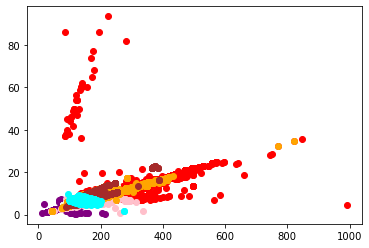

In [80]:
#filter rows of original data
filtered_label0 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 0) )]
filtered_label1 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 1) )]
filtered_label2 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 2) )]
filtered_label3 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 3) )]
filtered_label4 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 4) )]
filtered_label5 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 5) )]
filtered_label6 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 6) )]
filtered_label7 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 7) )]
filtered_label8 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 8) )]
filtered_label9 = df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 9) )]



#Plotting the results
plt.scatter(filtered_label0['CO2_emissions_combined'] ,filtered_label0['Fuel_consumption_combined'] ,color = 'purple')
plt.scatter(filtered_label1['CO2_emissions_combined'] ,filtered_label1['Fuel_consumption_combined'],color = 'red')
plt.scatter(filtered_label2['CO2_emissions_combined'],filtered_label2['Fuel_consumption_combined'],color = 'black')
plt.scatter(filtered_label3['CO2_emissions_combined'] ,filtered_label3['Fuel_consumption_combined'],color = 'yellow')
plt.scatter(filtered_label4['CO2_emissions_combined'] ,filtered_label4['Fuel_consumption_combined'],color = 'green')
plt.scatter(filtered_label5['CO2_emissions_combined'] ,filtered_label5['Fuel_consumption_combined'],color = 'pink' )
plt.scatter(filtered_label6['CO2_emissions_combined'] ,filtered_label6['Fuel_consumption_combined'] ,color = 'beige')
plt.scatter(filtered_label7['CO2_emissions_combined'] ,filtered_label7['Fuel_consumption_combined'] ,color = 'orange')
plt.scatter(filtered_label8['CO2_emissions_combined'] ,filtered_label8['Fuel_consumption_combined'] ,color = 'brown')
plt.scatter(filtered_label9['CO2_emissions_combined'] ,filtered_label9['Fuel_consumption_combined'],color = 'cyan' )
plt.show()

**As we see in the above plot and results something is wrong, My best estimation is that scaling a categorical data is not a good option**

### MiniBatchKMeans without hot encoding 

In [81]:
#df=df.drop(['Benzine','LPG','Diesel','LNG','Waterstof','CNG','Alcohol','L1','L3','L5','M1','M2','M3','N1','N2'], axis=1)

In [82]:
mbk  = MiniBatchKMeans(n_clusters=10,random_state=12,batch_size=3072)
mbk.fit(x_df_without_hot_encoding)

MiniBatchKMeans(batch_size=3072, n_clusters=10, random_state=12)

In [83]:
print(np.unique(mbk.labels_))

[0 1 2 3 4 5 6 7 8 9]


Maximum number of iterations for a single run

In [84]:
print(mbk.n_iter_)

29


Sum of squared distances 

In [85]:
print(mbk.inertia_)

392139289.2835744


In [86]:
mbk.labels_

array([2, 4, 6, ..., 7, 2, 8])

In [87]:
df['Cluster'] = mbk.labels_
df[['European_vehicle_category','Fuel_consumption_combined','CO2_emissions_combined','Cluster']].head(10)

,European_vehicle_category,Fuel_consumption_combined,CO2_emissions_combined,Cluster
0,M1,6.7,160,2
1,M1,3.2,85,4
2,M1,5.7,136,6
3,M1,9.8,236,1
4,M1,8.8,211,1
5,M1,4.9,114,0
6,M1,7.1,167,3
7,N1,5.6,147,2
8,M1,5.3,120,0
9,M1,8.5,227,1


In [88]:
#df=df.drop(['Benzine','LPG','Diesel','LNG','Waterstof','CNG','Alcohol','L1','L3','L5','M1','M2','M3','N1','N2'], axis=1)

**Exploring the result with 1 to see the CO2 and fuel consumption values if it makes sense**

In [89]:
df[['European_vehicle_category','Fuel_consumption_combined','CO2_emissions_combined','Cluster']].loc[(df['Cluster']==1) & (df['Benzine']== 1)]

,European_vehicle_category,Fuel_consumption_combined,CO2_emissions_combined,Cluster
3,M1,9.8,236,1
4,M1,8.8,211,1
103,M1,9.2,220,1
138,M1,9.0,226,1
150,M1,9.2,220,1
...,...,...,...,...
8808620,M1,8.8,211,1
8808655,M1,9.1,218,1
8808681,M1,9.3,223,1
8808734,M1,9.4,225,1


In [90]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 0) )]
print(' Co2 min:',df2['CO2_emissions_combined'].min(),' CO2 max:',df2['CO2_emissions_combined'].max())
print(' Fuel consumption min:',df2['Fuel_consumption_combined'].min(),' Fuel consumption max:',df2['Fuel_consumption_combined'].max())

 Co2 min: 108  CO2 max: 125
 Fuel consumption min: 0.3  Fuel consumption max: 56.3


In [91]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 1) )]
print(' Co2 min:',df2['CO2_emissions_combined'].min(),' CO2 max:',df2['CO2_emissions_combined'].max())
print(' Fuel consumption min:',df2['Fuel_consumption_combined'].min(),' Fuel consumption max:',df2['Fuel_consumption_combined'].max())

 Co2 min: 210  CO2 max: 245
 Fuel consumption min: 0.3  Fuel consumption max: 93.6


In [92]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 2) )]
print(' Co2 min:',df2['CO2_emissions_combined'].min(),' CO2 max:',df2['CO2_emissions_combined'].max())
print(' Fuel consumption min:',df2['Fuel_consumption_combined'].min(),' Fuel consumption max:',df2['Fuel_consumption_combined'].max())

 Co2 min: 144  CO2 max: 162
 Fuel consumption min: 0.7  Fuel consumption max: 60.0


In [93]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 3) )]
print(' Co2 min:',df2['CO2_emissions_combined'].min(),' CO2 max:',df2['CO2_emissions_combined'].max())
print(' Fuel consumption min:',df2['Fuel_consumption_combined'].min(),' Fuel consumption max:',df2['Fuel_consumption_combined'].max())

 Co2 min: 163  CO2 max: 183
 Fuel consumption min: 4.6  Fuel consumption max: 77.0


In [94]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 4) )]
print(' Co2 min:',df2['CO2_emissions_combined'].min(),' CO2 max:',df2['CO2_emissions_combined'].max())
print(' Fuel consumption min:',df2['Fuel_consumption_combined'].min(),' Fuel consumption max:',df2['Fuel_consumption_combined'].max())

 Co2 min: 12  CO2 max: 92
 Fuel consumption min: 0.6  Fuel consumption max: 86.0


In [95]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 5) )]
print(' Co2 min:',df2['CO2_emissions_combined'].min(),' CO2 max:',df2['CO2_emissions_combined'].max())
print(' Fuel consumption min:',df2['Fuel_consumption_combined'].min(),' Fuel consumption max:',df2['Fuel_consumption_combined'].max())

 Co2 min: 306  CO2 max: 990
 Fuel consumption min: 1.71  Fuel consumption max: 35.55


In [96]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 6) )]
print(' Co2 min:',df2['CO2_emissions_combined'].min(),' CO2 max:',df2['CO2_emissions_combined'].max())
print(' Fuel consumption min:',df2['Fuel_consumption_combined'].min(),' Fuel consumption max:',df2['Fuel_consumption_combined'].max())

 Co2 min: 124  CO2 max: 143
 Fuel consumption min: 0.5  Fuel consumption max: 62.0


In [97]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 7) )]
print(' Co2 min:',df2['CO2_emissions_combined'].min(),' CO2 max:',df2['CO2_emissions_combined'].max())
print(' Fuel consumption min:',df2['Fuel_consumption_combined'].min(),' Fuel consumption max:',df2['Fuel_consumption_combined'].max())

 Co2 min: 184  CO2 max: 209
 Fuel consumption min: 0.9  Fuel consumption max: 86.0


In [98]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 8) )]
print(' Co2 min:',df2['CO2_emissions_combined'].min(),' CO2 max:',df2['CO2_emissions_combined'].max())
print(' Fuel consumption min:',df2['Fuel_consumption_combined'].min(),' Fuel consumption max:',df2['Fuel_consumption_combined'].max())

 Co2 min: 92  CO2 max: 107
 Fuel consumption min: 0.5  Fuel consumption max: 46.0


In [99]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['Cluster'] == 9) )]
print(' Co2 min:',df2['CO2_emissions_combined'].min(),' CO2 max:',df2['CO2_emissions_combined'].max())
print(' Fuel consumption min:',df2['Fuel_consumption_combined'].min(),' Fuel consumption max:',df2['Fuel_consumption_combined'].max())

 Co2 min: 246  CO2 max: 305
 Fuel consumption min: 0.88  Fuel consumption max: 82.0


**View only the cars with M1 catagory and Benzin to see the difference since the algorithm take fuel type into consideration**

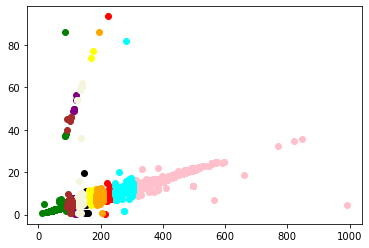

In [100]:
#filter rows of original data
filtered_label0 = df.loc[(df['Cluster']==0) & (df['Benzine']== 1) & (df['European_vehicle_category']== 'M1')]
filtered_label1 = df.loc[(df['Cluster']==1) & (df['Benzine']== 1) & (df['European_vehicle_category']== 'M1')]
filtered_label2 = df.loc[(df['Cluster']==2) & (df['Benzine']== 1) & (df['European_vehicle_category']== 'M1')]
filtered_label3 = df.loc[(df['Cluster']==3) & (df['Benzine']== 1) & (df['European_vehicle_category']== 'M1')]
filtered_label4 = df.loc[(df['Cluster']==4) & (df['Benzine']== 1) & (df['European_vehicle_category']== 'M1')]
filtered_label5 = df.loc[(df['Cluster']==5) & (df['Benzine']== 1) & (df['European_vehicle_category']== 'M1')]
filtered_label6 = df.loc[(df['Cluster']==6) & (df['Benzine']== 1) & (df['European_vehicle_category']== 'M1')]
filtered_label7 = df.loc[(df['Cluster']==7) & (df['Benzine']== 1) & (df['European_vehicle_category']== 'M1')]
filtered_label8 = df.loc[(df['Cluster']==8) & (df['Benzine']== 1) & (df['European_vehicle_category']== 'M1')]
filtered_label9 = df.loc[(df['Cluster']==9) & (df['Benzine']== 1) & (df['European_vehicle_category']== 'M1')]



#Plotting the results
plt.scatter(filtered_label0['CO2_emissions_combined'] ,filtered_label0['Fuel_consumption_combined'] ,color = 'purple')
plt.scatter(filtered_label1['CO2_emissions_combined'] ,filtered_label1['Fuel_consumption_combined'],color = 'red')
plt.scatter(filtered_label2['CO2_emissions_combined'],filtered_label2['Fuel_consumption_combined'],color = 'black')
plt.scatter(filtered_label3['CO2_emissions_combined'] ,filtered_label3['Fuel_consumption_combined'],color = 'yellow')
plt.scatter(filtered_label4['CO2_emissions_combined'] ,filtered_label4['Fuel_consumption_combined'],color = 'green')
plt.scatter(filtered_label5['CO2_emissions_combined'] ,filtered_label5['Fuel_consumption_combined'],color = 'pink' )
plt.scatter(filtered_label6['CO2_emissions_combined'] ,filtered_label6['Fuel_consumption_combined'] ,color = 'beige')
plt.scatter(filtered_label7['CO2_emissions_combined'] ,filtered_label7['Fuel_consumption_combined'] ,color = 'orange')
plt.scatter(filtered_label8['CO2_emissions_combined'] ,filtered_label8['Fuel_consumption_combined'] ,color = 'brown')
plt.scatter(filtered_label9['CO2_emissions_combined'] ,filtered_label9['Fuel_consumption_combined'],color = 'cyan' )

plt.show()

**After further investigation and researching I couldn't find  a way to make Kmeans sort the clusters from small to big so I will hot encoding it**

In [101]:
df['soorted_cluster'] = df['Cluster'].map( {4:1, 8:2, 0:3 , 6:4 , 2:5 , 3:6 , 7:7 , 1:8 , 9:9 , 5:10} ).astype(int)

**View only the cars with M1 catagory and Benzin to see the difference since the algorithm take fuel type into consideration**

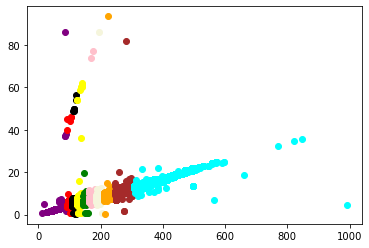

In [102]:
#filter rows of original data
filtered_label0 = df.loc[(df['soorted_cluster']==1) & (df['Benzine']== 1) & (df['European_vehicle_category']== 'M1')]
filtered_label1 = df.loc[(df['soorted_cluster']==2) & (df['Benzine']== 1) & (df['European_vehicle_category']== 'M1')]
filtered_label2 = df.loc[(df['soorted_cluster']==3) & (df['Benzine']== 1) & (df['European_vehicle_category']== 'M1')]
filtered_label3 = df.loc[(df['soorted_cluster']==4) & (df['Benzine']== 1) & (df['European_vehicle_category']== 'M1')]
filtered_label4 = df.loc[(df['soorted_cluster']==5) & (df['Benzine']== 1) & (df['European_vehicle_category']== 'M1')]
filtered_label5 = df.loc[(df['soorted_cluster']==6) & (df['Benzine']== 1) & (df['European_vehicle_category']== 'M1')]
filtered_label6 = df.loc[(df['soorted_cluster']==7) & (df['Benzine']== 1) & (df['European_vehicle_category']== 'M1')]
filtered_label7 = df.loc[(df['soorted_cluster']==8) & (df['Benzine']== 1) & (df['European_vehicle_category']== 'M1')]
filtered_label8 = df.loc[(df['soorted_cluster']==9) & (df['Benzine']== 1) & (df['European_vehicle_category']== 'M1')]
filtered_label9 = df.loc[(df['soorted_cluster']==10) & (df['Benzine']== 1) & (df['European_vehicle_category']== 'M1')]



#Plotting the results
plt.scatter(filtered_label0['CO2_emissions_combined'] ,filtered_label0['Fuel_consumption_combined'] ,color = 'purple')
plt.scatter(filtered_label1['CO2_emissions_combined'] ,filtered_label1['Fuel_consumption_combined'],color = 'red')
plt.scatter(filtered_label2['CO2_emissions_combined'],filtered_label2['Fuel_consumption_combined'],color = 'black')
plt.scatter(filtered_label3['CO2_emissions_combined'] ,filtered_label3['Fuel_consumption_combined'],color = 'yellow')
plt.scatter(filtered_label4['CO2_emissions_combined'] ,filtered_label4['Fuel_consumption_combined'],color = 'green')
plt.scatter(filtered_label5['CO2_emissions_combined'] ,filtered_label5['Fuel_consumption_combined'],color = 'pink' )
plt.scatter(filtered_label6['CO2_emissions_combined'] ,filtered_label6['Fuel_consumption_combined'] ,color = 'beige')
plt.scatter(filtered_label7['CO2_emissions_combined'] ,filtered_label7['Fuel_consumption_combined'] ,color = 'orange')
plt.scatter(filtered_label8['CO2_emissions_combined'] ,filtered_label8['Fuel_consumption_combined'] ,color = 'brown')
plt.scatter(filtered_label9['CO2_emissions_combined'] ,filtered_label9['Fuel_consumption_combined'],color = 'cyan' )

plt.show()

In [103]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['soorted_cluster'] == 1) )]
print(' Co2 min:',df2['CO2_emissions_combined'].min(),' CO2 max:',df2['CO2_emissions_combined'].max())
print(' Fuel consumption min:',df2['Fuel_consumption_combined'].min(),' Fuel consumption max:',df2['Fuel_consumption_combined'].max())

 Co2 min: 12  CO2 max: 92
 Fuel consumption min: 0.6  Fuel consumption max: 86.0


In [104]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['soorted_cluster'] == 2) )]
print(' Co2 min:',df2['CO2_emissions_combined'].min(),' CO2 max:',df2['CO2_emissions_combined'].max())
print(' Fuel consumption min:',df2['Fuel_consumption_combined'].min(),' Fuel consumption max:',df2['Fuel_consumption_combined'].max())

 Co2 min: 92  CO2 max: 107
 Fuel consumption min: 0.5  Fuel consumption max: 46.0


In [105]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['soorted_cluster'] == 3) )]
print(' Co2 min:',df2['CO2_emissions_combined'].min(),' CO2 max:',df2['CO2_emissions_combined'].max())
print(' Fuel consumption min:',df2['Fuel_consumption_combined'].min(),' Fuel consumption max:',df2['Fuel_consumption_combined'].max())

 Co2 min: 108  CO2 max: 125
 Fuel consumption min: 0.3  Fuel consumption max: 56.3


In [106]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['soorted_cluster'] == 4) )]
print(' Co2 min:',df2['CO2_emissions_combined'].min(),' CO2 max:',df2['CO2_emissions_combined'].max())
print(' Fuel consumption min:',df2['Fuel_consumption_combined'].min(),' Fuel consumption max:',df2['Fuel_consumption_combined'].max())

 Co2 min: 124  CO2 max: 143
 Fuel consumption min: 0.5  Fuel consumption max: 62.0


In [107]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['soorted_cluster'] == 5) )]
print(' Co2 min:',df2['CO2_emissions_combined'].min(),' CO2 max:',df2['CO2_emissions_combined'].max())
print(' Fuel consumption min:',df2['Fuel_consumption_combined'].min(),' Fuel consumption max:',df2['Fuel_consumption_combined'].max())

 Co2 min: 144  CO2 max: 162
 Fuel consumption min: 0.7  Fuel consumption max: 60.0


In [108]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['soorted_cluster'] == 6) )]
print(' Co2 min:',df2['CO2_emissions_combined'].min(),' CO2 max:',df2['CO2_emissions_combined'].max())
print(' Fuel consumption min:',df2['Fuel_consumption_combined'].min(),' Fuel consumption max:',df2['Fuel_consumption_combined'].max())

 Co2 min: 163  CO2 max: 183
 Fuel consumption min: 4.6  Fuel consumption max: 77.0


In [109]:
df2=df[((df['European_vehicle_category'] == 'M1') & (df['soorted_cluster'] == 7) )]
print(' Co2 min:',df2['CO2_emissions_combined'].min(),' CO2 max:',df2['CO2_emissions_combined'].max())
print(' Fuel consumption min:',df2['Fuel_consumption_combined'].min(),' Fuel consumption max:',df2['Fuel_consumption_combined'].max())

 Co2 min: 184  CO2 max: 209
 Fuel consumption min: 0.9  Fuel consumption max: 86.0


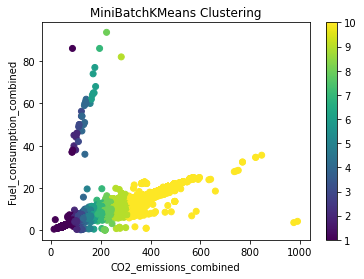

In [110]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df['CO2_emissions_combined'],df['Fuel_consumption_combined'],
                     c=df['soorted_cluster'])
ax.set_title('MiniBatchKMeans Clustering')
ax.set_xlabel('CO2_emissions_combined')
ax.set_ylabel('Fuel_consumption_combined')
plt.colorbar(scatter)

## Conclusion

The research was successfully completed and I got the result I wanted, By using the Kmeans algorithm which is useful for unsupervised ML for the unlabeled datasets, As we see in this research I achieved my goal to classify all the cars in the RDW dataset is a really efficient way, I learned a lot of useful information about data provisioning ,ML in specific Kmeans and MiniBatchKMeans algorithms and domain understanding different methods and techniques.